<a href="https://colab.research.google.com/github/aTamucci02/cosc470s24/blob/main/Copy_of_cifar10_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
!git clone https://github.com/kartoone/DeepLearningPython nn

--2024-03-15 13:05:21--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  76.8MB/s    in 2.1s    

2024-03-15 13:05:24 (76.8 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
!tar -xzvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
import pickle
import numpy as np
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def vectorize(label):
    result = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
    result[label] = 1.
    return np.reshape(result, (10,1))

{b'batch_label': b'testing batch 1 of 1', b'labels': [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0

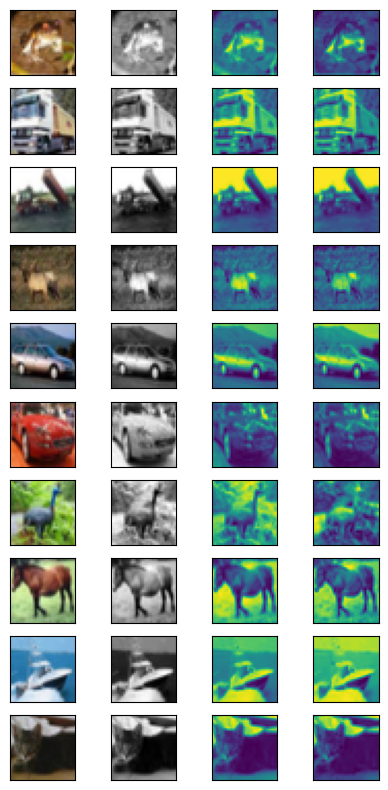

In [ ]:
import numpy as np
training = {'labels':[],'data':[]}
for i in range(1,6):
  filename = f"cifar-10-batches-py/data_batch_{i}"
  dict = unpickle(filename)
#  print(dict)
  training['labels'].extend(dict[b'labels'])
  training['data'].extend(dict[b'data'])

raw_test_data = unpickle("cifar-10-batches-py/test_batch")
print(raw_test_data)
red_test_data = [[np.reshape(d[:1024]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
green_test_data = [[np.reshape(d[1024:2048]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
blue_test_data = [[np.reshape(d[2048:]/255,(1024,1)), label] for d, label in zip(raw_test_data[b'data'],raw_test_data[b'labels'])]
print(red_test_data[0][0])
print(red_test_data[0][1])
np.set_printoptions(linewidth=1000000)
print(np.reshape(training['data'][0][:1024], (32,32)))
red_training_data = [[np.reshape(d[:1024]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
green_training_data = [[np.reshape(d[1024:2048]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
blue_training_data = [[np.reshape(d[2048:]/255,(1024,1)), vectorize(label)] for d, label in zip(training['data'],training['labels'])]
print(red_training_data[0][0])
print(red_training_data[0][1])
training['data'] = np.array(training['data'])
training['data'] = training['data'].reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 4, figsize=(5,10))
for i in range(10):
  axes[i,0].imshow(training['data'][i])
  axes[i,1].imshow(np.reshape(red_training_data[i][0],(32,32)), cmap="gray")
  axes[i,2].imshow(np.reshape(green_training_data[i][0],(32,32)), cmap="gray")
  axes[i,3].imshow(np.reshape(blue_training_data[i][0],(32,32)), cmap="gray")
  for c in range(4):
    axes[i,c].set_xticks([])
    axes[i,c].set_yticks([])

In [ ]:
def vote(a1, a2 ,a3):
  a1vote = np.argmax(a1)
  a1max = max(a1)
  a2vote = np.argmax(a2)
  a2max = max(a2)
  a3vote = np.argmax(a3)
  a3max = max(a3)
  if(a1vote==a2vote or a1vote==a3vote):
    return a1vote
  if(a2vote==a1vote or a2vote==a3vote):
    return a2vote
  if(a3vote==a1vote or a3vote==a2vote):
    return a3vote
  else:
   return [a1vote, a2vote, a3vote] [np.argmax([a1max,a2max,a3max])]

a1 = np.reshape([0.10645274, 0.11490241,0.01397113, 0.06388619, 0.0241833, 0.0135392, 0.0571729, 0.0040372, 0.31627183, 0.0402948], (10,1))
a2 = np.reshape([0.10645274, 0.11490241,0.01397113, 0.06388619, 0.0241833, 0.0135392, 0.05717297, 0.00403721, 0.31627183, 0.04029489], (10,1))
a3 = np.reshape([0.10645274, 0.91490241,0.01397113, 0.06388619, 0.0241833, 0.0135392, 0.05717297, 0.00403721, 0.31627183, 0.04029489], (10,1))
print(vote(a1,a2,a3))

8


In [ ]:
import nn.network as network
net_RED = network.Network([1024, 30, 10])
net_GREEN = network.Network([1024, 30, 10])
net_BLUE = network.Network([1024, 30, 10])

# modify the rawtrianing data labels so that they are vectorized
# create three sets of training data ... one set is the RED training data, etc...
net_RED.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)
net_GREEN.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)
net_BLUE.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)


correct_images = []

for i in range(len(red_test_data)):
  a1 = net_RED.feedforward(red_test_data[0][0])
  a2= net_GREEN.feedforward(red_test_data[0][0])
  a3 = net_BLUE.feedforward(red_test_data[0][0])
  ans = vote(a1,a2,a3)
  if(ans==red_test_data[i][1]):
    correct_images.append(i)

print(f"overall accuracy: {len(correct_images)/len(red_test_data)}")

Epoch 0 : 1507 / 10000
Epoch 1 : 1792 / 10000
Epoch 2 : 1808 / 10000
Epoch 3 : 1795 / 10000
Epoch 4 : 1992 / 10000
Epoch 5 : 2044 / 10000
Epoch 6 : 2057 / 10000
Epoch 7 : 2238 / 10000
Epoch 8 : 2381 / 10000
Epoch 9 : 2339 / 10000
Epoch 10 : 2260 / 10000
Epoch 11 : 2457 / 10000
Epoch 12 : 2420 / 10000
Epoch 13 : 2511 / 10000
Epoch 14 : 2455 / 10000
Epoch 15 : 2502 / 10000
Epoch 16 : 2408 / 10000
Epoch 17 : 2357 / 10000
Epoch 18 : 2580 / 10000


KeyboardInterrupt: 

3
